In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [42]:
df_gene = pd.read_csv("G9_liver_gene-expr.csv")
column = df_gene.columns
print(column)
df_gene

Index(['Unnamed: 0', 'Label', 'X..100130426', 'X..100133144', 'X..100134869',
       'X..10357', 'X..10431', 'X..136542', 'X..155060', 'X..26823',
       ...
       'ZXDA.7789', 'ZXDB.158586', 'ZXDC.79364', 'ZYG11A.440590',
       'ZYG11B.79699', 'ZYX.7791', 'ZZEF1.23140', 'ZZZ3.26009',
       'psiTPTE22.387590', 'tAKR.389932'],
      dtype='object', length=20533)


,Unnamed: 0,Label,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.2V.A95S.01,Primary Tumor,0.0,1.5051,3.7074,90.1124,1017.1038,0.0,141.3911,0.6516,...,24.7597,273.6602,794.2662,18.2440,499.1041,3172.5037,890.0472,510.1808,3.9094,6.5157
1,TCGA.2Y.A9GS.01,Primary Tumor,0.0,26.4120,2.6663,71.0054,639.2311,0.0,122.7206,1.4786,...,68.5067,632.8241,1153.7703,71.4638,1000.4929,5301.1336,755.5446,860.5224,6.4071,482.9966
2,TCGA.2Y.A9GT.01,Primary Tumor,0.0,0.0000,4.4833,95.5122,742.4344,0.0,95.0460,1.7933,...,46.6263,1219.4575,1133.3782,12.5532,1289.3970,3219.0092,860.7935,523.6494,14.3466,83.3894
3,TCGA.2Y.A9GU.01,Primary Tumor,0.0,5.7222,5.1216,61.6679,1186.9807,0.0,280.2709,0.8341,...,18.3511,285.2758,1150.2786,9.1755,941.7437,3092.9899,1339.6283,343.6655,2.5024,2.5024
4,TCGA.2Y.A9GV.01,Primary Tumor,0.0,11.4975,5.4230,104.4670,878.1726,0.0,282.5719,0.0000,...,41.4552,999.1540,1631.9797,4.2301,1380.7107,2902.7073,575.2961,665.8206,2.5381,119.2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,TCGA.ZP.A9D4.01,Primary Tumor,0.0,1.0069,6.9127,71.2827,685.0516,0.0,24.3247,0.0000,...,41.2954,797.0584,1006.9297,2.2628,1239.4287,2386.0840,405.0346,791.4015,3.3941,309.9986
417,TCGA.ZS.A9CD.01,Primary Tumor,0.0,4.2224,1.7881,64.5605,1087.9038,0.0,41.3223,0.0000,...,30.0526,1253.1931,773.8542,7.5131,1238.1668,4028.5500,635.6123,434.2600,6.7618,196.0932
418,TCGA.ZS.A9CE.01,Primary Tumor,0.0,0.0000,8.7527,64.9891,1119.2560,0.0,35.0109,0.0000,...,33.3698,248.9059,975.9300,28.9934,882.9322,4041.5755,491.7943,577.1335,0.0000,124.7265
419,TCGA.ZS.A9CF.01,Primary Tumor,0.0,7.3398,9.8897,105.8856,544.4521,0.0,262.5775,0.0000,...,55.8236,1332.1847,1458.3046,55.1344,1257.0641,1172.2950,431.4266,836.6644,2.7567,124.0524


In [4]:
print(df_gene.isnull().sum())

Unnamed: 0          0
Label               0
X..100130426        0
X..100133144        0
X..100134869        0
                   ..
ZYX.7791            0
ZZEF1.23140         0
ZZZ3.26009          0
psiTPTE22.387590    0
tAKR.389932         0
Length: 20533, dtype: int64


In [5]:
# rename the dataset to label
unique_labels = df_gene.iloc[:, 1].unique()

# print the name of the classification
for label in unique_labels:
    print(label)

Primary Tumor
Solid Tissue Normal


In [7]:
df_gene['Label'].value_counts()

Primary Tumor          371
Solid Tissue Normal     50
Name: Label, dtype: int64

In [8]:
# define the dependt variable that need to be predicted 
y = df_gene['Label'].values

# encoding catergorical data
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
Y = Labelencoder.fit_transform(y) # Primary Tumor = 0, Solid Tissue Normal = 1

In [9]:
# define x and normalization
# Define the independent variables to drop the Label and Unnamed: 0
X = df_gene.drop(labels = ['Label','Unnamed: 0'], axis = 1)

import numpy as np
feature_names = np.array(X.columns)

In [23]:
# normalization
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler()
# standard-scaler
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
print(X_scale)
print()

# log2
# 标准缩放（Standard Scaler）
#scaler = StandardScaler()
#X_log2 = np.log2(X)
#X_log2 = X_log2.values.reshape(-1, 1)  # 将数据转换为二维数组
#X_log2 = scaler.fit_transform(X_log2)
#print(X_log2)
#print()


[[-0.2455814  -0.58725413 -0.20692492 ... -0.28781296 -0.18113906
  -0.90419753]
 [-0.2455814   4.41962356 -0.44998847 ...  1.26310678 -0.08521335
   4.01989126]
 [-0.2455814  -0.88981493 -0.02577709 ... -0.2281891   0.21970804
  -0.1097629 ]
 ...
 [-0.2455814  -0.88981493  0.97099126 ...  0.00857852 -0.33128198
   0.31742641]
 [-0.2455814   0.58565897  1.2364444  ...  1.15749031 -0.22540921
   0.31046007]
 [-0.2455814  -0.88981493  0.84807035 ...  0.20919226 -0.12066174
   0.19029922]]



In [22]:
# log2
# 标准缩放（Standard Scaler）
#scaler = StandardScaler()
X_log2 = np.log2(X)
#X_log2 = X_log2.values.reshape(-1, 1)  # 将数据转换为二维数组
#X_log2 = scaler.fit_transform(X_log2)
print(X_log2)

     X..100130426  X..100133144  X..100134869  X..10357   X..10431  X..136542  \
0            -inf      0.589859      1.890408  6.493654   9.990251       -inf   
1            -inf      4.723122      1.414839  6.149857   9.320194       -inf   
2            -inf          -inf      2.164561  6.577613   9.536120       -inf   
3            -inf      2.516570      2.356595  5.946448  10.213081       -inf   
4            -inf      3.523248      2.439091  6.706903   9.778361       -inf   
..            ...           ...           ...       ...        ...        ...   
416          -inf      0.009920      2.789249  6.155480   9.420069       -inf   
417          -inf      2.078063      0.838427  6.012580  10.087335       -inf   
418          -inf          -inf      3.129728  6.022126  10.128324       -inf   
419          -inf      2.875741      3.305927  6.726363   9.088661       -inf   
420          -inf          -inf      3.040226  5.837070   9.842208       -inf   

     X..155060  X..26823  X

C:\Users\Minyan\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


In [24]:
# split the data into train and test to verify accuracy after fitting 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size = 0.3, random_state = 42)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [25]:
# define classifier using the Boruta
import xgboost as xgb
model = xgb. XGBClassifier()
from boruta import BorutaPy
feat_selector = BorutaPy(model, n_estimators = 'auto', verbose = 2, random_state = 1)
feat_selector.fit(X_train, Y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20531
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	20506
Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	11
Rejected: 	20506
Iteration: 	10 / 100
Confirmed: 	14
Tentative: 	11
Rejected: 	20506
Iteration: 	11 / 100
Confirmed: 	14
Tentative: 	11
Rejected: 	20506
Iteration: 	12 / 100
Confirmed: 	22
Tentative: 	3
Rejected: 	20506
Iteration: 	13 / 100
Confirmed: 	22
Tentative: 	3
Rejected: 	20506
Iteration: 	14 / 100
Confirmed: 	22
Tentative: 	3
Rejected: 	20506
Iteration: 	15 / 100
Confirmed: 	22
Tentative: 	3
Rejected: 	20506
Iteratio

BorutaPy(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bynode=None,
                                 colsample_bytree=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None, gpu_id=None,
                                 grow_policy=None, importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 n_estimators=69, n_jobs=None,
     

[False False False ... False False False]
[10255 10255 10255 ... 10255 10255 10255]
Feature: X..155060                      Rank: 1,  Keep: True
Feature: A2M.2                          Rank: 1,  Keep: True
Feature: ABAT.18                        Rank: 1,  Keep: True
Feature: ACSL4.2182                     Rank: 1,  Keep: True
Feature: ADAMTS13.11093                 Rank: 1,  Keep: True
Feature: ADCY1.107                      Rank: 1,  Keep: True
Feature: AGBL4.84871                    Rank: 1,  Keep: True
Feature: AMIGO3.386724                  Rank: 1,  Keep: True
Feature: ANGPTL6.83854                  Rank: 1,  Keep: True
Feature: C14orf180.400258               Rank: 1,  Keep: True
Feature: CACNA1S.779                    Rank: 1,  Keep: True
Feature: CD200.4345                     Rank: 1,  Keep: True
Feature: COL15A1.1306                   Rank: 1,  Keep: True
Feature: CPEB3.22849                    Rank: 1,  Keep: True
Feature: CTU1.90353                     Rank: 1,  Keep: True
F

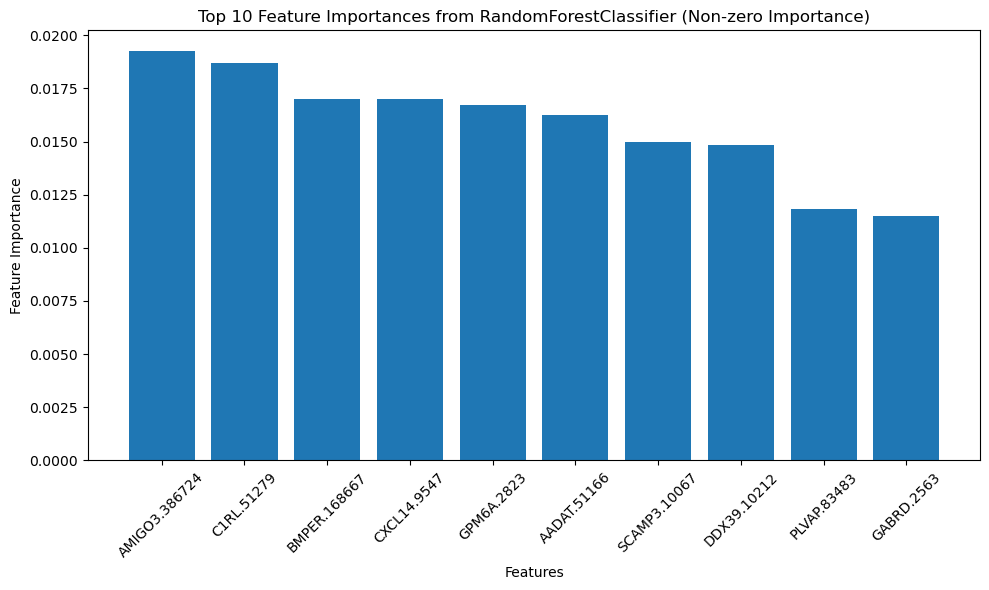

Accuracy =  0.9763779527559056


<AxesSubplot:>

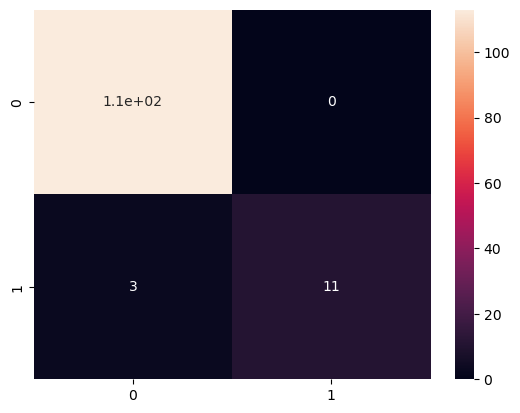

In [26]:
#  check the selected features
print(feat_selector.support_) # should we accept the feature or not
# check the ranking of the features
print(feat_selector.ranking_)
# filter down the selected features
X_filtered = feat_selector.transform(X_train)

# review the features
# zip feature names, ranks and decisions
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))
cnt = 0
for feat in feature_ranks:
    if feat[2] == True:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        cnt += 1
print(cnt)


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
import numpy as np

forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, Y_train)
feature_importances = forest.feature_importances_
print(feature_importances)


# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]
non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]
# Print the top 10 feature importances
top_n = 10  # Change this to the desired number of top features to print
count = 0
for idx in non_zero_indices:
    if count < top_n:
        print(f"{feature_names[idx]}: {feature_importances[idx]}")
        count += 1
    else:
        break
        

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]

# Select the top 10 feature indices
top_n = 10  # Change this to the desired number of top features to visualize
selected_indices = non_zero_indices[:top_n]

# Print the top 10 feature importances
for idx in selected_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_indices)), feature_importances[selected_indices])
plt.xticks(range(len(selected_indices)), [feature_names[i] for i in selected_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()

forest.fit(X_filtered, Y_train)

#Now predict on test data using the trained model. 

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_forest = forest.predict(X_test_filtered)


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(Y_test, prediction_forest))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_forest)
#print(cm)
sns.heatmap(cm, annot=True)

In [30]:
df_gene = pd.read_csv("G9_liver_gene-expr.csv")
df_gene

,Unnamed: 0,Label,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,TCGA.2V.A95S.01,Primary Tumor,0.0,1.5051,3.7074,90.1124,1017.1038,0.0,141.3911,0.6516,...,24.7597,273.6602,794.2662,18.2440,499.1041,3172.5037,890.0472,510.1808,3.9094,6.5157
1,TCGA.2Y.A9GS.01,Primary Tumor,0.0,26.4120,2.6663,71.0054,639.2311,0.0,122.7206,1.4786,...,68.5067,632.8241,1153.7703,71.4638,1000.4929,5301.1336,755.5446,860.5224,6.4071,482.9966
2,TCGA.2Y.A9GT.01,Primary Tumor,0.0,0.0000,4.4833,95.5122,742.4344,0.0,95.0460,1.7933,...,46.6263,1219.4575,1133.3782,12.5532,1289.3970,3219.0092,860.7935,523.6494,14.3466,83.3894
3,TCGA.2Y.A9GU.01,Primary Tumor,0.0,5.7222,5.1216,61.6679,1186.9807,0.0,280.2709,0.8341,...,18.3511,285.2758,1150.2786,9.1755,941.7437,3092.9899,1339.6283,343.6655,2.5024,2.5024
4,TCGA.2Y.A9GV.01,Primary Tumor,0.0,11.4975,5.4230,104.4670,878.1726,0.0,282.5719,0.0000,...,41.4552,999.1540,1631.9797,4.2301,1380.7107,2902.7073,575.2961,665.8206,2.5381,119.2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,TCGA.ZP.A9D4.01,Primary Tumor,0.0,1.0069,6.9127,71.2827,685.0516,0.0,24.3247,0.0000,...,41.2954,797.0584,1006.9297,2.2628,1239.4287,2386.0840,405.0346,791.4015,3.3941,309.9986
417,TCGA.ZS.A9CD.01,Primary Tumor,0.0,4.2224,1.7881,64.5605,1087.9038,0.0,41.3223,0.0000,...,30.0526,1253.1931,773.8542,7.5131,1238.1668,4028.5500,635.6123,434.2600,6.7618,196.0932
418,TCGA.ZS.A9CE.01,Primary Tumor,0.0,0.0000,8.7527,64.9891,1119.2560,0.0,35.0109,0.0000,...,33.3698,248.9059,975.9300,28.9934,882.9322,4041.5755,491.7943,577.1335,0.0000,124.7265
419,TCGA.ZS.A9CF.01,Primary Tumor,0.0,7.3398,9.8897,105.8856,544.4521,0.0,262.5775,0.0000,...,55.8236,1332.1847,1458.3046,55.1344,1257.0641,1172.2950,431.4266,836.6644,2.7567,124.0524


In [71]:
# define the dependt variable that need to be predicted 
y = df_gene['Label'].values
Y = Labelencoder.fit_transform(y) # Primary Tumor = 0, Solid Tissue Normal = 1
# define x and normalization
# Define the independent variables to drop the Label and Unnamed: 0
X = df_gene.drop(labels = ['Label','Unnamed: 0'], axis = 1)

import numpy as np
feature_names = np.array(X.columns)

In [91]:
df = X +1

In [92]:
df

,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,X..280660,X..317712,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,2.0,3.5051,5.7074,92.1124,1019.1038,2.0,143.3911,2.6516,2.0000,2.0,...,26.7597,275.6602,796.2662,20.2440,501.1041,3174.5037,892.0472,512.1808,5.9094,8.5157
1,2.0,28.4120,4.6663,73.0054,641.2311,2.0,124.7206,3.4786,2.0000,2.0,...,70.5067,634.8241,1155.7703,73.4638,1002.4929,5303.1336,757.5446,862.5224,8.4071,484.9966
2,2.0,2.0000,6.4833,97.5122,744.4344,2.0,97.0460,3.7933,2.8967,2.0,...,48.6263,1221.4575,1135.3782,14.5532,1291.3970,3221.0092,862.7935,525.6494,16.3466,85.3894
3,2.0,7.7222,7.1216,63.6679,1188.9807,2.0,282.2709,2.8341,2.0000,2.0,...,20.3511,287.2758,1152.2786,11.1755,943.7437,3094.9899,1341.6283,345.6655,4.5024,4.5024
4,2.0,13.4975,7.4230,106.4670,880.1726,2.0,284.5719,2.0000,2.0000,2.0,...,43.4552,1001.1540,1633.9797,6.2301,1382.7107,2904.7073,577.2961,667.8206,4.5381,121.2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2.0,3.0069,8.9127,73.2827,687.0516,2.0,26.3247,2.0000,2.0000,2.0,...,43.2954,799.0584,1008.9297,4.2628,1241.4287,2388.0840,407.0346,793.4015,5.3941,311.9986
417,2.0,6.2224,3.7881,66.5605,1089.9038,2.0,43.3223,2.0000,2.0000,2.0,...,32.0526,1255.1931,775.8542,9.5131,1240.1668,4030.5500,637.6123,436.2600,8.7618,198.0932
418,2.0,2.0000,10.7527,66.9891,1121.2560,2.0,37.0109,2.0000,2.0000,2.0,...,35.3698,250.9059,977.9300,30.9934,884.9322,4043.5755,493.7943,579.1335,2.0000,126.7265
419,2.0,9.3398,11.8897,107.8856,546.4521,2.0,264.5775,2.0000,2.0000,2.0,...,57.8236,1334.1847,1460.3046,57.1344,1259.0641,1174.2950,433.4266,838.6644,4.7567,126.0524


In [88]:
type(X)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Columns: 20531 entries, X..100130426 to tAKR.389932
dtypes: float64(20531)
memory usage: 65.9 MB


In [93]:
# log2
# 标准缩放（Standard Scaler）
#scaler = StandardScaler()
X_log2 = np.log2(df)
#X_log2 = X_log2.values.reshape(-1, 1)  # 将数据转换为二维数组
#X_log2 = scaler.fit_transform(X_log2)
X_log2

,X..100130426,X..100133144,X..100134869,X..10357,X..10431,X..136542,X..155060,X..26823,X..280660,X..317712,...,ZXDA.7789,ZXDB.158586,ZXDC.79364,ZYG11A.440590,ZYG11B.79699,ZYX.7791,ZZEF1.23140,ZZZ3.26009,psiTPTE22.387590,tAKR.389932
0,1.0,1.809456,2.512834,6.525323,9.993085,1.0,7.163812,1.406863,1.00000,1.0,...,4.741990,8.106747,9.637107,4.339422,8.968967,11.632315,9.800976,9.000509,2.563012,3.090125
1,1.0,4.828428,2.222279,6.189931,9.324701,1.0,6.962556,1.798507,1.00000,1.0,...,6.139688,9.310213,10.174639,6.198962,9.969376,12.372629,9.565187,9.752418,3.071608,8.921831
2,1.0,1.000000,2.696728,6.607511,9.540001,1.0,6.600597,1.923453,1.53441,1.0,...,5.603665,10.254388,10.148957,3.863265,10.334717,11.653297,9.752871,9.037957,4.030919,6.415985
3,1.0,2.949012,2.832201,5.992494,10.215510,1.0,8.140937,1.502891,1.00000,1.0,...,4.347035,8.166293,10.170274,3.482267,9.882251,11.595719,10.389769,8.433233,2.170694,2.170694
4,1.0,3.754620,2.892002,6.734263,9.781643,1.0,8.152649,1.000000,1.00000,1.0,...,5.441457,9.967448,10.674174,2.639255,10.433284,11.504177,9.173168,9.383317,2.182088,6.922308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1.0,1.588277,3.155863,6.195401,9.424275,1.0,4.718345,1.000000,1.00000,1.0,...,5.436142,9.642157,9.978610,2.091801,10.277786,11.221638,8.669008,9.631907,2.431382,8.285396
417,1.0,2.637471,1.921474,6.056594,10.089985,1.0,5.437038,1.000000,1.00000,1.0,...,5.002369,10.293694,9.599642,3.249916,10.276318,11.976761,9.316536,8.769044,3.131227,7.630036
418,1.0,1.000000,3.426627,6.065854,10.130900,1.0,5.209878,1.000000,1.00000,1.0,...,5.144446,7.971003,9.933587,4.953889,9.789423,11.981416,8.947766,9.177752,1.000000,6.985574
419,1.0,3.223392,3.571640,6.753359,9.093951,1.0,8.047547,1.000000,1.00000,1.0,...,5.853587,10.381743,10.512054,5.836288,10.298136,10.197579,8.759644,9.711950,2.249961,6.977880


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X_log2, Y, test_size = 0.3, random_state = 42)

In [112]:
type(Y_train)

numpy.ndarray

In [98]:
# define classifier using the Boruta
import xgboost as xgb
model = xgb. XGBClassifier()

In [99]:
from boruta import BorutaPy
feat_selector = BorutaPy(model, n_estimators = 'auto', verbose = 2, random_state = 1)
feat_selector.fit(X_train, Y_train)

InvalidIndexError: (slice(None, None, None), array([    0,     1,     2, ..., 20528, 20529, 20530], dtype=int64))

In [ ]:
#  check the selected features
print(feat_selector.support_) # should we accept the feature or not
# check the ranking of the features
print(feat_selector.ranking_)
# filter down the selected features
X_filtered = feat_selector.transform(X_train)

# review the features
# zip feature names, ranks and decisions
feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))
cnt = 0
for feat in feature_ranks:
    if feat[2] == True:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        cnt += 1
print(cnt)


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
import numpy as np

forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train, Y_train)
feature_importances = forest.feature_importances_
print(feature_importances)


# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]
non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]
# Print the top 10 feature importances
top_n = 10  # Change this to the desired number of top features to print
count = 0
for idx in non_zero_indices:
    if count < top_n:
        print(f"{feature_names[idx]}: {feature_importances[idx]}")
        count += 1
    else:
        break
        

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

non_zero_indices = sorted_indices[feature_importances[sorted_indices] > 0]

# Select the top 10 feature indices
top_n = 10  # Change this to the desired number of top features to visualize
selected_indices = non_zero_indices[:top_n]

# Print the top 10 feature importances
for idx in selected_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_indices)), feature_importances[selected_indices])
plt.xticks(range(len(selected_indices)), [feature_names[i] for i in selected_indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importances from RandomForestClassifier (Non-zero Importance)")
plt.tight_layout()
plt.show()

forest.fit(X_filtered, Y_train)

#Now predict on test data using the trained model. 

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_forest = forest.predict(X_test_filtered)


#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(Y_test, prediction_forest))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_forest)
#print(cm)
sns.heatmap(cm, annot=True)